<a href="https://colab.research.google.com/github/QuantumStar1999/GoogleColabNotebooks/blob/main/geek_olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Enhancing Olympic Experience**: Develop a project that enhances the experience for athletes, coaches, officials, or spectators during the Olympics. This could include innovations in event scheduling, ticketing systems, venue management, training analysis, or tools for real-time updates and communication.

**Data-driven Insights**: Utilize data science and machine learning techniques to derive valuable insights from Olympic-related data. This could involve analyzing historical event data, athlete profiles, sports statistics, social media sentiment analysis, or other relevant datasets to provide unique perspectives or predictive analytics.

**Fan Engagement and Participation**: Create a project that promotes fan engagement, interaction, and participation before, during, or after the Olympic Games. This could include mobile apps, websites, social media platforms, virtual experiences, gamification elements, or immersive technologies that connect fans with athletes, facilitate conversations, or offer interactive experiences.

**Sustainability and Social Impact**: Address sustainability challenges or promote positive social impact within the context of the Olympics. Develop projects focused on eco-friendly event management, energy conservation, waste reduction, inclusivity, diversity, or initiatives that inspire and educate communities through the power of the Olympic Games.

**Broadcasting and Media Innovations**: Develop projects that enhance the broadcasting and media coverage of the Olympic Games. This could include technologies for personalized viewing experiences, interactive content, data-driven storytelling, or advanced analytics to provide in-depth analysis and insights for broadcasters and viewers.

In [ ]:
!wget -q https://raw.githubusercontent.com/AshishJangra27/GFG-Hackathon/main/medals.csv -O medals.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import logging
import warnings

In [ ]:
df = pd.read_csv("medals.csv")
df.head(10)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE
5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/oskar-eriksson,Oskar ERIKSSON,Sweden,SE,SWE
6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR
7,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN
8,Curling,beijing-2022,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE
9,Curling,beijing-2022,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE


In [ ]:
list(df.columns)

['discipline_title',
 'slug_game',
 'event_title',
 'event_gender',
 'medal_type',
 'participant_type',
 'participant_title',
 'athlete_url',
 'athlete_full_name',
 'country_name',
 'country_code',
 'country_3_letter_code']

In [ ]:
df.isnull().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

discipline_title          0.000000
slug_game                 0.000000
event_title               0.000000
event_gender              0.000000
medal_type                0.000000
participant_type          0.000000
participant_title        69.654791
athlete_url              21.523713
athlete_full_name        16.702770
country_name              0.000000
country_code              6.922616
country_3_letter_code     0.000000
dtype: float64

In [ ]:
print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [ ]:
dict1= dict(zip(df.country_name, df.country_code))
dict2= dict(zip(df.country_name, df.country_3_letter_code))
dict3= dict(zip(df.athlete_full_name,df.athlete_url))

def nametocode(x:str)->str:
  try:
    return dict1[x]
  except:
    logging.error(f"{x} is not present in keys.")

def nametocode3(x:str)->str:
  try:
    return dict2[x]
  except:
    logging.error(f"{x} is not present in keys.")

def fullnametourl(x:str)->str:
  if not dict3[x].isnull():
    return dict3[x]
  else:
    logging.error(f"{x} is not present in athlete_url.")


In [ ]:
df.drop(['country_code', 'country_3_letter_code', 'athlete_url'],axis=1,inplace=True)
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Kristin SKASLIEN,Norway
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Magnus NEDREGOTTEN,Norway
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Almida DE VAL,Sweden


In [ ]:
df[df['athlete_full_name'].isnull()]

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name
6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,NaN,Great Britain
7,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,NaN,Japan
8,Curling,beijing-2022,Women,Women,BRONZE,GameTeam,Sweden,NaN,Sweden
9,Curling,beijing-2022,Men,Men,GOLD,GameTeam,Sweden,NaN,Sweden
10,Curling,beijing-2022,Men,Men,SILVER,GameTeam,Great Britain,NaN,Great Britain
...,...,...,...,...,...,...,...,...,...
21569,Polo,paris-1900,polo men,Men,BRONZE,GameTeam,"Bagatelle Polo Club, Paris #3",NaN,MIX
21570,Polo,paris-1900,polo men,Men,BRONZE,GameTeam,A North American Team #4,NaN,MIX
21630,Gymnastics Artistic,athens-1896,team parallel bars men,Men,GOLD,GameTeam,Germany team,NaN,Germany
21631,Gymnastics Artistic,athens-1896,team parallel bars men,Men,SILVER,GameTeam,Panellinios Gymnastikos Syllogos #1,NaN,Greece


In [ ]:
df['place']= df['slug_game'].map(lambda x: x[:-5])
df['year'] = df['slug_game'].map(lambda x: x[-4:])
try:
  df.drop('slug_game', axis=1, inplace=True)
except:
  print("Not present in column")
df.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,place,year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy,beijing,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy,beijing,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Kristin SKASLIEN,Norway,beijing,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Magnus NEDREGOTTEN,Norway,beijing,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Almida DE VAL,Sweden,beijing,2022


In [ ]:
df.groupby(by=['year', 'medal_type']).count()

discipline_title  event_title  event_gender  \
year medal_type                                                
1896 BRONZE                    38           38            38   
     GOLD                      44           44            44   
     SILVER                    44           44            44   
1900 BRONZE                    96           96            96   
     GOLD                      99           99            99   
...                           ...          ...           ...   
2020 GOLD                     376          376           376   
     SILVER                   374          374           374   
2022 BRONZE                   118          118           118   
     GOLD                     119          119           119   
     SILVER                   118          118           118   

                 participant_type  participant_title  athlete_full_name  \
year medal_type                                                           
1896 BRONZE                    38                  4                 38   
     GOLD                      44                  4                 42   
     SILVER                    44                  3                 43   
1900 BRONZE                    96                 34                 72   
     GOLD                      99                 36                 73   
...                           ...                ...                ...   
2020 GOLD                     376                132                316   
     SILVER                   374                132                314   
2022 BRONZE                   118                 40                 96   
     GOLD                     119                 41                 98   
     SILVER                   118                 40                 96   

                 country_name  place  
year medal_type                       
1896 BRONZE                38     38  
     GOLD                  44     44  
     SILVER                44     44  
1900 BRONZE                96     96  
     GOLD                  99     99  
...                       ...    ...  
2020 GOLD                 376    376  
     SILVER               374    374  
2022 BRONZE               118    118  
     GOLD                 119    119  
     SILVER               118    118  

[111 rows x 8 columns]

In [ ]:
pd.DataFrame(df.groupby(by=['year', 'medal_type']).size()).tail(20)

0
year medal_type     
2010 GOLD         93
     SILVER       94
2012 BRONZE      380
     GOLD        331
     SILVER      333
2014 BRONZE      106
     GOLD        106
     SILVER      102
2016 BRONZE      389
     GOLD        337
     SILVER      337
2018 BRONZE      110
     GOLD        112
     SILVER      109
2020 BRONZE      438
     GOLD        376
     SILVER      374
2022 BRONZE      118
     GOLD        119
     SILVER      118

<Axes: xlabel='year'>

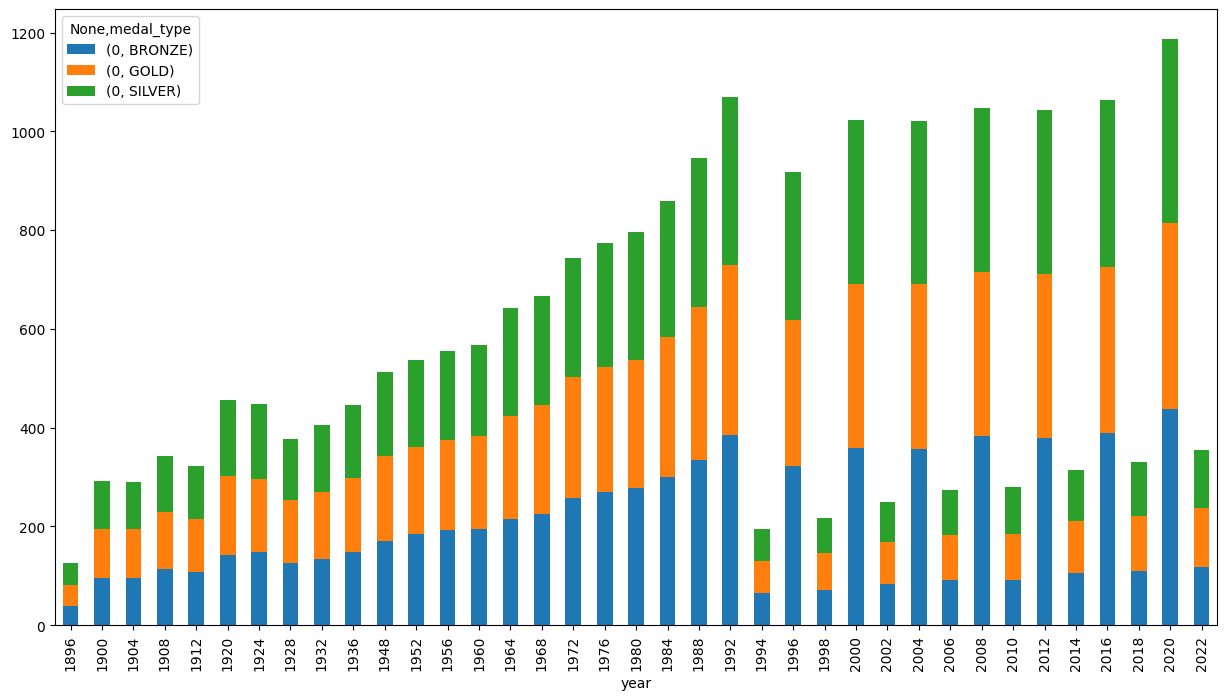

In [ ]:
pd.DataFrame(df.groupby(by=['year', 'medal_type']).size()).unstack().plot(kind='bar', stacked=True, figsize=(15, 8))

## Insights
- Winter Olympics started at 1994, happens at 4 years interval.
- Total number of event or winners in winter olympics is much lower compare to olympics.

In [ ]:
# from google.colab import data_table
# data_table.enable_dataframe_formatter()